# DORA single dataset analysis

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from analyse import *
import time


df = pd.read_excel("./data/ASSLacore-Séance1.xlsx")
df.head() 

,Unnamed: 0,61f534215ee62b06a288c14d_pos_x,61f534215ee62b06a288c14d_pos_y,61f534215ee62b06a288c14d_ts,61f5343b5ee62b06a288c14e_pos_x,61f5343b5ee62b06a288c14e_pos_y,61f5343b5ee62b06a288c14e_ts,61f534845ee62b06a288c14f_pos_x,61f534845ee62b06a288c14f_pos_y,61f534845ee62b06a288c14f_ts,...,61f538115ee62b06a288c154_ts,61f53a565ee62b06a288c155_pos_x,61f53a565ee62b06a288c155_pos_y,61f53a565ee62b06a288c155_ts,61f53bd55ee62b06a288c156_pos_x,61f53bd55ee62b06a288c156_pos_y,61f53bd55ee62b06a288c156_ts,61f53d005ee62b06a288c157_pos_x,61f53d005ee62b06a288c157_pos_y,61f53d005ee62b06a288c157_ts
0,0,2.387223,48.893747,392210,2.388543,48.894083,306507,2.388087,48.893935,271105,...,91943,2.388518,48.894115,50565,2.388510,48.894047,68652,0,0,0
1,1,2.388502,48.894000,392441,2.388403,48.894118,306763,2.388525,48.893890,271868,...,92764,2.388465,48.894007,52448,2.388702,48.893930,68859,0,0,0
2,2,2.388477,48.894002,393431,2.388403,48.894118,306879,2.388525,48.893883,272869,...,93765,2.388467,48.894010,53448,2.388703,48.893937,69859,0,0,0
3,3,0.000000,0.000000,0,2.388403,48.894118,307750,2.388527,48.893882,273868,...,94770,2.388467,48.894007,54446,2.388718,48.893942,70856,0,0,0
4,4,0.000000,0.000000,0,2.388403,48.894118,307866,2.388528,48.893878,274868,...,95659,2.388467,48.894005,55446,2.388713,48.893962,71858,0,0,0


In [2]:
%matplotlib widget
# Select which student to analyze
STUDENT = "61f5343b5ee62b06a288c14e"

# Load latitude, longitude and timestamps of the desired student in a dataframe
sdf = df[[f"{STUDENT}_pos_y", f"{STUDENT}_pos_x", f"{STUDENT}_ts"]]
sdf = sdf.rename(columns={f"{STUDENT}_pos_y": "LAT", f"{STUDENT}_pos_x": "LONG", f"{STUDENT}_ts": "TS"})

# remove the trailing rows
sdf.drop(sdf[sdf.LAT == 0].index, inplace=True)

sdf["TS"] = sdf["TS"] - sdf["TS"].min()
sdf

,LAT,LONG,TS
0,48.894083,2.388543,0
1,48.894118,2.388403,256
2,48.894118,2.388403,372
3,48.894118,2.388403,1243
4,48.894118,2.388403,1359
...,...,...,...
391,48.893820,2.388415,336374
392,48.893820,2.388415,337269
393,48.893820,2.388415,337385
394,48.893820,2.388415,338246


## Equirectangular Projection

,LAT,LONG,TS,X,Y
0,48.894083,2.388543,0,96.573319,115.753919
1,48.894118,2.388403,256,86.338448,119.645741
2,48.894118,2.388403,372,86.338448,119.645741
3,48.894118,2.388403,1243,86.338448,119.645741
4,48.894118,2.388403,1359,86.338448,119.645741
...,...,...,...,...,...
391,48.893820,2.388415,336374,87.215722,86.509653
392,48.893820,2.388415,337269,87.215722,86.509653
393,48.893820,2.388415,337385,87.215722,86.509653
394,48.893820,2.388415,338246,87.215722,86.509653


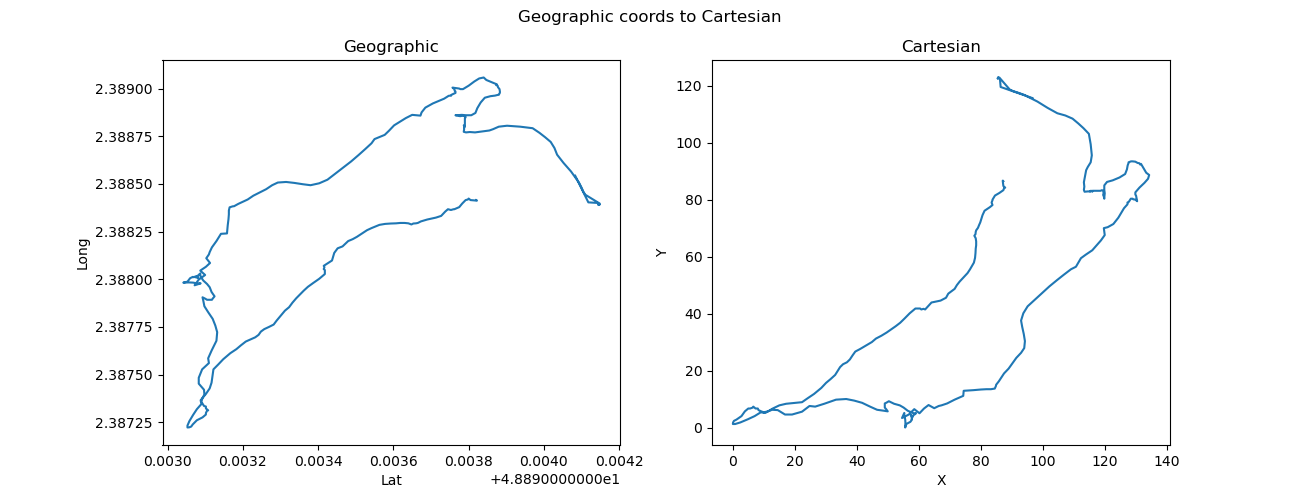

In [6]:
EARTH_RADIUS = 6371_000
plt.rcParams['figure.figsize'] = [13, 5]
def latlong_to_xy(lat, long):
    """
    Convert lat and long X, Y coordinates using Equirectangular projection
    lat: np 1d Array
    long: np 1d Array
    """
    lat, long = np.deg2rad(lat), np.deg2rad(long)
    std_lat = lat.mean()

    return EARTH_RADIUS * long * math.cos(std_lat), EARTH_RADIUS * lat

# Convert from lat/long to X/Y
sdf["X"], sdf["Y"] = latlong_to_xy(sdf[["LAT"]], sdf[["LONG"]])

# Set cartesian origins to the lowest values
sdf["X"] = sdf["X"] - sdf["X"].min()
sdf["Y"] = sdf["Y"] - sdf["Y"].min()

display(sdf)

fig, ax = plt.subplots(1, 2)
fig.suptitle("Geographic coords to Cartesian")
ax[0].plot(sdf["LAT"], sdf["LONG"])
ax[0].set_ylabel("Long")
ax[0].set_xlabel("Lat")
ax[0].set_title("Geographic")
ax[1].plot(sdf["X"], sdf["Y"])
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_title("Cartesian")

plt.show()


## Raw data

,LAT,LONG,TS,X,Y,dist,dt,speed
0,48.894083,2.388543,0,96.573319,115.753919,NaN,NaN,NaN
1,48.894118,2.388403,256,86.338448,119.645741,10.949834,0.256,42.772789
2,48.894118,2.388403,372,86.338448,119.645741,0.000000,0.116,0.000000
3,48.894118,2.388403,1243,86.338448,119.645741,0.000000,0.871,0.000000
4,48.894118,2.388403,1359,86.338448,119.645741,0.000000,0.116,0.000000
...,...,...,...,...,...,...,...,...
391,48.893820,2.388415,336374,87.215722,86.509653,0.000000,0.115,0.000000
392,48.893820,2.388415,337269,87.215722,86.509653,0.000000,0.895,0.000000
393,48.893820,2.388415,337385,87.215722,86.509653,0.000000,0.116,0.000000
394,48.893820,2.388415,338246,87.215722,86.509653,0.000000,0.861,0.000000


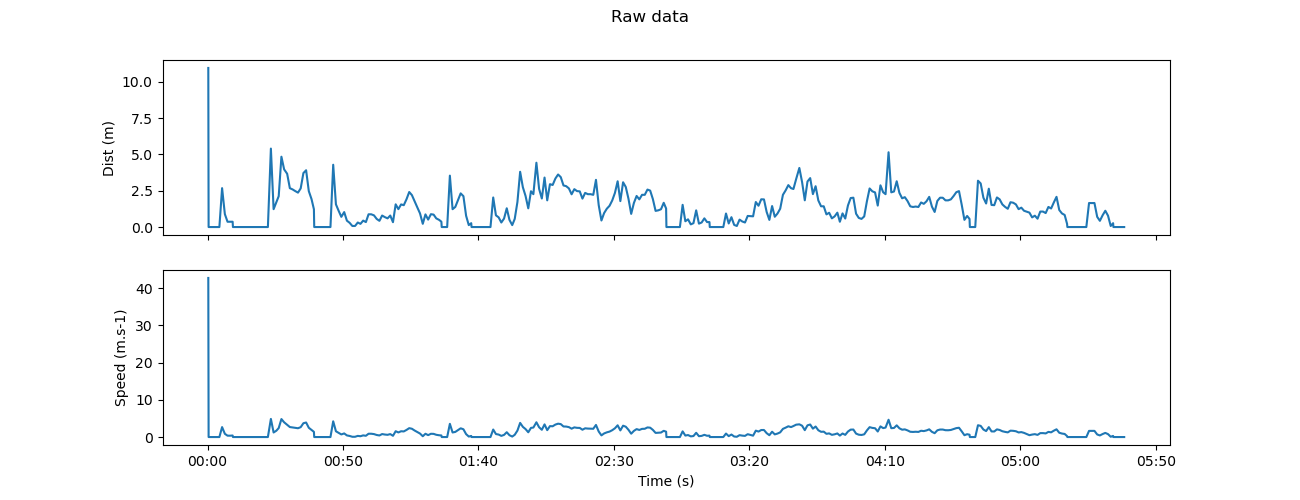

In [7]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

sdf['dist'] = dist(sdf.loc[1:, 'X'], sdf.loc[1:, 'Y'], sdf["X"].shift(), sdf["Y"].shift())

# Calculate relative time between each point (s)
sdf['dt'] = (sdf.loc[1:, 'TS'] - sdf.TS.shift()) / 1000

# Calculate relative speed between each point (m/s)
sdf['speed'] = sdf['dist'] / sdf['dt']



display(sdf)

TIME_FORMATTER = matplotlib.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))

# Draw the plots
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Raw data")
ax[0].plot(sdf['TS'], sdf['dist'])
ax[0].set_ylabel("Dist (m)")
ax[1].plot(sdf['TS'], sdf['speed'])
ax[1].set_ylabel("Speed (m.s-1)")
ax[1].set_xlabel("Time (s)")
ax[0].xaxis.set_major_formatter(TIME_FORMATTER)

## Data cleaning

Number of rows before cleanup	 389
First stable point index: 	  1
Invalid points: 	 []


,LAT,LONG,TS,X,Y,dist,dt,speed,haversine_dist,IS_STOPED
0,48.894118,2.388403,372,86.338448,119.645741,NaN,NaN,NaN,NaN,True
1,48.894118,2.388403,1243,86.338448,119.645741,0.0,0.871,0.0,0.0,True
2,48.894118,2.388403,1359,86.338448,119.645741,0.0,0.116,0.0,0.0,True
3,48.894118,2.388403,2235,86.338448,119.645741,0.0,0.876,0.0,0.0,True
4,48.894118,2.388403,2351,86.338448,119.645741,0.0,0.116,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...
384,48.893820,2.388415,336374,87.215722,86.509653,0.0,0.115,0.0,0.0,False
385,48.893820,2.388415,337269,87.215722,86.509653,0.0,0.895,0.0,0.0,False
386,48.893820,2.388415,337385,87.215722,86.509653,0.0,0.116,0.0,0.0,False
387,48.893820,2.388415,338246,87.215722,86.509653,0.0,0.861,0.0,0.0,False


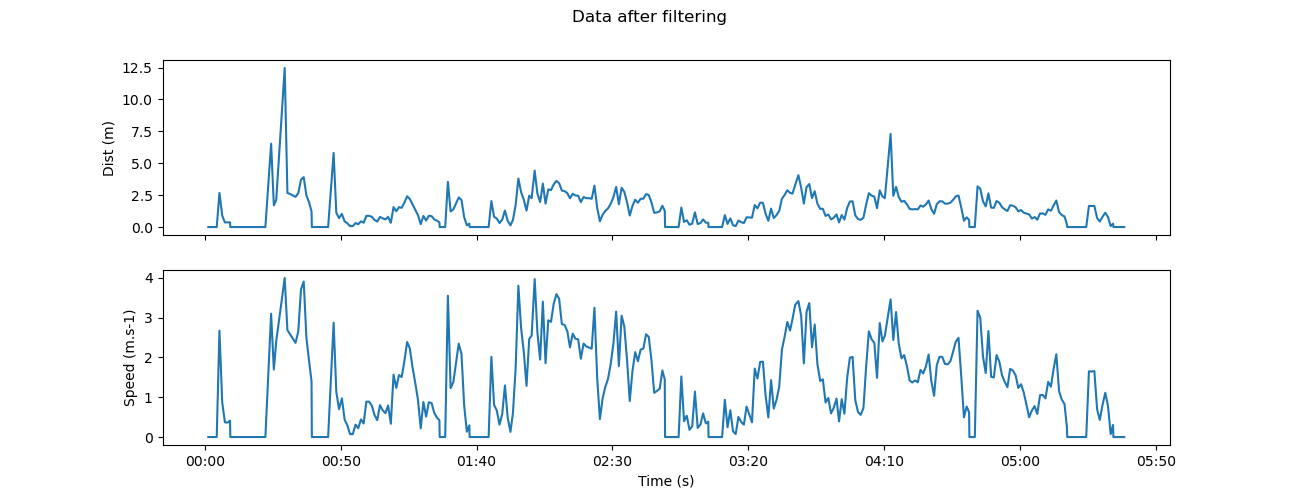

In [17]:
SPEED_THRESHOLD = 4 # m/s

print(f"Number of rows before cleanup\t {len(sdf)}")


# vectorized haversine function
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def first_stable_point(x, y, ts):
    distances = dist(x[1:], y[1:],x.shift(), y.shift())
    dts = (ts[1:] - ts.shift()) / 1000
    speeds = distances / dts
    ret = np.argmax(speeds < 6)
    return ret

def invalid_points(x, y, ts):
    i = 0
    j = i + 1

    ret = []
    while j < len(x):
        distance = dist(x[i], y[i], x[j], y[j])
        dt = (ts[j] - ts[i]) / 1000
        speed = distance / dt
        if speed > SPEED_THRESHOLD:
            ret.append(j)
            j += 1
        else:
            j += 1
            i = j - 1
    return ret

first_stable_point_index = first_stable_point(sdf['X'], sdf['Y'], sdf['TS'])
print("First stable point index: \t ", first_stable_point_index)

if first_stable_point_index > 1:
        sdf.drop(range(0, first_stable_point_index), inplace=True)
        sdf.reset_index(inplace=True, drop=True)

to_del = invalid_points(sdf['X'], sdf['Y'], sdf['TS'])

print("Invalid points: \t", to_del)
sdf.drop(to_del, inplace=True)
sdf.reset_index(inplace=True, drop=True)


# Calculate relative distance between each points (m)
sdf['haversine_dist'] = haversine_np(sdf.LONG.shift(), sdf.LAT.shift(),
                 sdf.loc[1:, 'LONG'], sdf.loc[1:, 'LAT']) * 1000

sdf['dist'] = dist(sdf.loc[1:, 'X'], sdf.loc[1:, 'Y'], sdf["X"].shift(), sdf["Y"].shift())

# Calculate relative time between each point (s)
sdf['dt'] = (sdf.loc[1:, 'TS'] - sdf.TS.shift()) / 1000

# Calculate relative speed between each point (m/s)
sdf['speed'] = sdf['dist'] / sdf['dt']



display(sdf)


# Draw the plots
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Data after filtering")
ax[0].plot(sdf['TS'], sdf['dist'])
ax[0].set_ylabel("Dist (m)")
ax[1].plot(sdf['TS'], sdf['speed'])
ax[1].set_ylabel("Speed (m.s-1)")
ax[1].set_xlabel("Time (s)")
ax[0].xaxis.set_major_formatter(TIME_FORMATTER)


## Data cleaning

## Stops detection

In [9]:
# 
# Smallest enclosing circle - Library (Python)
# 
# Copyright (c) 2020 Project Nayuki
# https://www.nayuki.io/page/smallest-enclosing-circle
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
# 
# You should have received a copy of the GNU Lesser General Public License
# along with this program (see COPYING.txt and COPYING.LESSER.txt).
# If not, see <http://www.gnu.org/licenses/>.
# 

import math, random


# Data conventions: A point is a pair of floats (x, y). A circle is a triple of floats (center x, center y, radius).

# Returns the smallest circle that encloses all the given points. Runs in expected O(n) time, randomized.
# Input: A sequence of pairs of floats or ints, e.g. [(0,5), (3.1,-2.7)].
# Output: A triple of floats representing a circle.
# Note: If 0 points are given, None is returned. If 1 point is given, a circle of radius 0 is returned.
# 
# Initially: No boundary points known
def make_circle(points):
	# Convert to float and randomize order
	shuffled = [(float(x), float(y)) for (x, y) in points]
	random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
	c = None
	for (i, p) in enumerate(shuffled):
		if c is None or not is_in_circle(c, p):
			c = _make_circle_one_point(shuffled[ : i + 1], p)
	return c


# One boundary point known
def _make_circle_one_point(points, p):
	c = (p[0], p[1], 0.0)
	for (i, q) in enumerate(points):
		if not is_in_circle(c, q):
			if c[2] == 0.0:
				c = make_diameter(p, q)
			else:
				c = _make_circle_two_points(points[ : i + 1], p, q)
	return c


# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right


def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))


_MULTIPLICATIVE_EPSILON = 1 + 1e-14

def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)


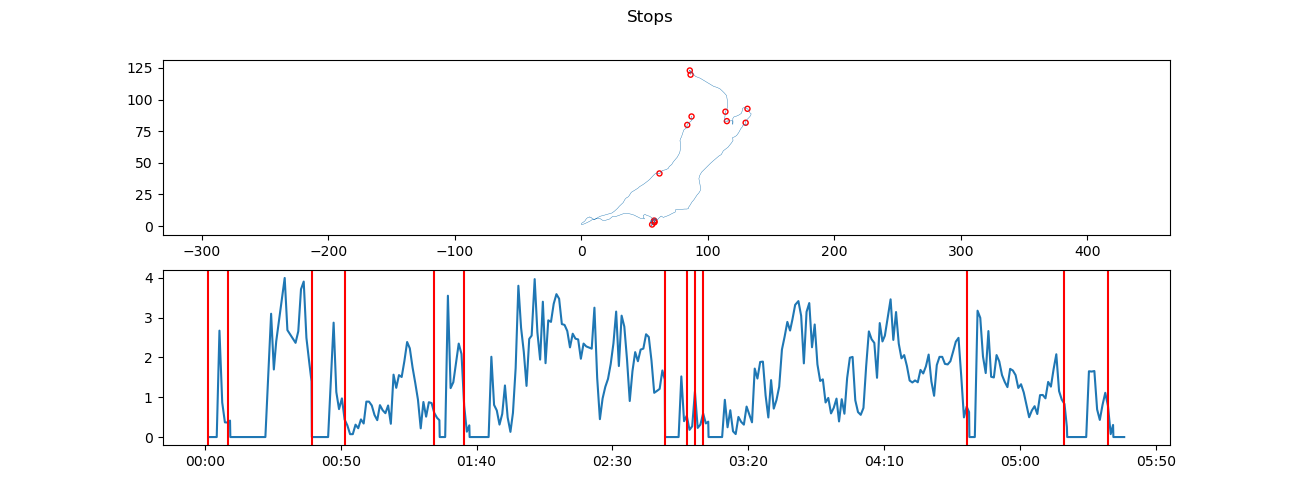

In [10]:
STOP_CIRCLE_RADIUS = .3
STOP_MIN_TIME = 3000

def get_next_n_sec(df, index, time):
    timestamps = df.TS
    t0 = timestamps[index]
    end_index = np.argmax(timestamps[index:] > t0 + time)
    return df[index:index + end_index]

next_n_sec = [get_next_n_sec(sdf, i, STOP_MIN_TIME) for i in range(sdf.shape[0])]
circles = [make_circle(list(zip(next_n_sec[i]["X"], next_n_sec[i]["Y"]))) if len(next_n_sec[i]) != 1 else None for i in range(sdf.shape[0])]

is_stoped = [circle is not None and circle[2] < STOP_CIRCLE_RADIUS for circle in circles]
stops = [i for i in range(1, len(is_stoped)) if is_stoped[i] and (i == 1 or is_stoped[i - 1] == False)]
stops_circles = [circles[i] for i in stops]
stops_timestamps = [sdf["TS"][i] for i in stops]

sdf["IS_STOPED"] = is_stoped

fig, ax = plt.subplots(2, 1)
fig.suptitle("Stops")
ax[0].axis('equal')

# for circle in circles:
#     if circle is not None and circle[2] < STOP_CIRCLE_RADIUS:
#         ax[0].add_patch(plt.Circle(circle[:2], circle[2] or 2, color='r', fill=False, linewidth=3))
        

for circle in stops_circles:
    ax[0].add_patch(plt.Circle(circle[:2], 2, color='r', fill=False))
ax[0].plot(sdf["X"], sdf["Y"], linewidth=0.3)

ax[1].plot( sdf["TS"], sdf["speed"])
ax[1].xaxis.set_major_formatter(TIME_FORMATTER)
[ax[1].axvline(ts, color='r') for ts in stops_timestamps]
plt.show()

## Beacons validation

In [11]:
# BEACONS = [
#     [1, 48.8124241, 2.1829787],
#     [2, 48.8118271, 2.1830392],
#     [3,	48.8112972,	2.1838760],
#     [4,	48.8108945,	2.1851528]
# ]

BEACONS = [
    [1, 48.8938208, 2.3883543],
    [16, 48.8949879, 2.3907824],
    [17, 48.8929774, 2.3879819],
    [18, 48.8928159, 2.3868641],
    [21, 48.8935197, 2.3876138],
    [7, 48.8941464, 2.3861955],
    [9, 48.8939147, 2.3884367],
    [13, 48.8932153, 2.3885151],
    [14, 48.8944649, 2.3890872],
    [15, 48.8947393, 2.3902093],
]

beacons_df = pd.DataFrame(BEACONS, columns=["id", "lat", "lng"])
beacons_df

,id,lat,lng
0,1,48.893821,2.388354
1,16,48.894988,2.390782
2,17,48.892977,2.387982
3,18,48.892816,2.386864
4,21,48.893520,2.387614
5,7,48.894146,2.386195
6,9,48.893915,2.388437
7,13,48.893215,2.388515
8,14,48.894465,2.389087
9,15,48.894739,2.390209


In [12]:
BEACON_RADIUS_M = 10
points_arr =  list(zip(sdf["LAT"], sdf["LONG"], sdf["TS"]))

# format the beacon data to feed into the evaluate_beacon() function
beacon_dict = [{"id": b[0], "name": b[0], "coords": [b[2], b[1]]} for b in BEACONS]

results = evaluate_beacon(points_arr, beacon_dict, BEACON_RADIUS_M=BEACON_RADIUS_M)

# Copy the results to the dataframe
for beacon in results:
    for key, val in beacon.items():
        if key == "coords": continue
        beacons_df.loc[beacons_df['id'] == beacon["id"], key] = val

beacons_df.style.applymap(
    lambda val: 'color: green' if val else 'color: red',
    subset=['valided']
    )

,id,lat,lng,valided,name,avgSpeed,time,timestamp,index,lap
0,1,48.893821,2.388354,True,1.000000,4.969239,313.000000,313372.000000,350.000000,nan
1,16,48.894988,2.390782,False,16.000000,nan,nan,0.000000,0.000000,nan
2,17,48.892977,2.387982,True,17.000000,7.098006,167.004000,167376.000000,194.000000,nan
3,18,48.892816,2.386864,False,18.000000,nan,nan,0.000000,0.000000,nan
4,21,48.893520,2.387614,False,21.000000,nan,nan,0.000000,0.000000,nan
5,7,48.894146,2.386195,False,7.000000,nan,nan,0.000000,0.000000,nan
6,9,48.893915,2.388437,False,9.000000,nan,nan,0.000000,0.000000,nan
7,13,48.893215,2.388515,True,13.000000,3.556858,137.005000,137377.000000,164.000000,nan
8,14,48.894465,2.389087,False,14.000000,nan,nan,0.000000,0.000000,nan
9,15,48.894739,2.390209,False,15.000000,nan,nan,0.000000,0.000000,nan


## Map Projections

In [13]:
geojson_lines = []
end_time = points_arr[-1][2]

# Create each line
for i in range(len(points_arr) - 1):
    geojson_lines.append({
        "coordinates": [
            [points_arr[i][1], points_arr[i][0]],
            [points_arr[i + 1][1], points_arr[i + 1][0]],
        ],
        "dates": [points_arr[i][2] + 1653343200000, points_arr[i + 1][2] + 1653343200000],
        "color": "red",
    })

# Create a feature from each line
features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": line["coordinates"],
        },
        "properties": {
            "times": line["dates"],
            "style": {
                "color": line["color"],
                "weight": line["weight"] if "weight" in line else 5,
            },
        },
    }
    for line in geojson_lines
]

# Generate the beacon markers
for b in beacons_df[['id', 'lat', 'lng', 'timestamp', 'valided']].itertuples():

    # Add a red marker for every beacon
    features.append({
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [b.lng, b.lat],
            },
            "properties": {
                "times": 0,
                'icon': 'circle', 'iconstyle': {'color': 'red', "radius": 10}
            },
        })
    
    # If the beacon was valided, add a green marker over the red one at the correct timestamp
    if b.valided:
        features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [b.lng, b.lat],
                },
                "properties": {
                    "times": [b.timestamp + 1653343200000],
                    'icon': 'circle', 'iconstyle': {'color': 'green', "radius": 10}
                },
            })

for stop in stops:
    # print(sdf[["LAT", "LONG", "TS"]].iloc[stop])
    row = sdf[["LAT", "LONG", "TS"]].iloc[stop]
    features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [row.LONG, row.LAT],
                },
                "properties": {
                    "times": [row.TS + 1653343200000],
                    'icon': 'circle', 'iconstyle': {'color': 'blue', "radius": 3}
                },
            })


In [14]:

import folium.plugins as plugins

f = folium.Figure(width=1000, height=500)
m = folium.Map()
f.add_child(m)

geojson = plugins.TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features,
    },
    period="PT1S",
    add_last_point=False,
    transition_time=100,
    
).add_to(m)

m.fit_bounds(geojson.get_bounds())

f

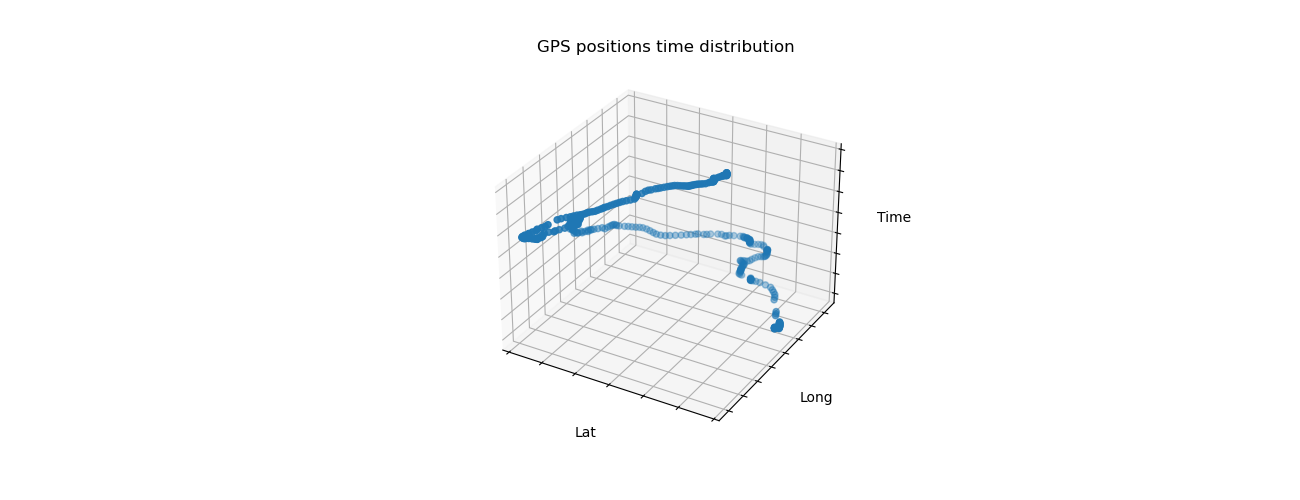

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [p[0] for p in points_arr]
ys = [p[1] for p in points_arr]
zs = [p[2] for p in points_arr]
ax.scatter(xs, ys, zs, marker='o')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Time')
ax.set_title("GPS positions time distribution")

plt.show()

In [16]:
chrono_s = (sdf["TS"].iloc[-1] - sdf["TS"].iloc[0]) // 1000
chrono_formatted = time.strftime('%M:%S', time.gmtime(chrono_s))
total_dist = round(sdf["dist"].sum())
avg_speed_with_stops = round(sdf["speed"].mean(), 2)
avg_speed_without_stops = round(sdf[sdf["IS_STOPED"] == False]["speed"].mean(), 2)
min_speed = round(sdf["speed"].min(), 3)
max_speed = round(sdf["speed"].max(), 3)
delta_speed = max_speed - min_speed

print(f'{"Chrono (s)" :40} {chrono_s}')
print(f'{"Chrono (min:sec)" :40} {chrono_formatted}')
print(f'{"Total distance (m)" :40} {total_dist}')
print(f'{"Average speed with stops (m/s)" :40} {avg_speed_with_stops}')
print(f'{"Average speed without stops (m/s)" :40} {avg_speed_without_stops}')
print(f'{"Min speed (m/s)" :40} {min_speed}')
print(f'{"Max speed (m/s)" :40} {max_speed}')
print(f'{"Delta speed (m/s)" :40} {delta_speed}')



Chrono (s)                               337
Chrono (min:sec)                         05:37
Total distance (m)                       452
Average speed with stops (m/s)           1.12
Average speed without stops (m/s)        1.44
Min speed (m/s)                          0.0
Max speed (m/s)                          4.0
Delta speed (m/s)                        4.0
